In [19]:
df<-read.csv('d:/data/titanic/train3.csv')
head(df)

Survived,Pclass,pclass1,plclass2,plcass3,Sex,male,female,Age,SibSp,Parch,Fare
0,3,0,0,1,male,1,0,22,1,0,7.2500
1,1,1,0,0,female,0,1,38,1,0,71.2833
1,3,0,0,1,female,0,1,26,0,0,7.9250
1,1,1,0,0,female,0,1,35,1,0,53.1000
0,3,0,0,1,male,1,0,35,0,0,8.0500
0,3,0,0,1,male,1,0,30,0,0,8.4583


In [20]:
library(dplyr)
df<-df %>% select(-Pclass,-Sex)
dim(df)
head(df)

[1] 891  10

Survived,pclass1,plclass2,plcass3,male,female,Age,SibSp,Parch,Fare
0,0,0,1,1,0,22,1,0,7.2500
1,1,0,0,0,1,38,1,0,71.2833
1,0,0,1,0,1,26,0,0,7.9250
1,1,0,0,0,1,35,1,0,53.1000
0,0,0,1,1,0,35,0,0,8.0500
0,0,0,1,1,0,30,0,0,8.4583



  0   1 
549 342 

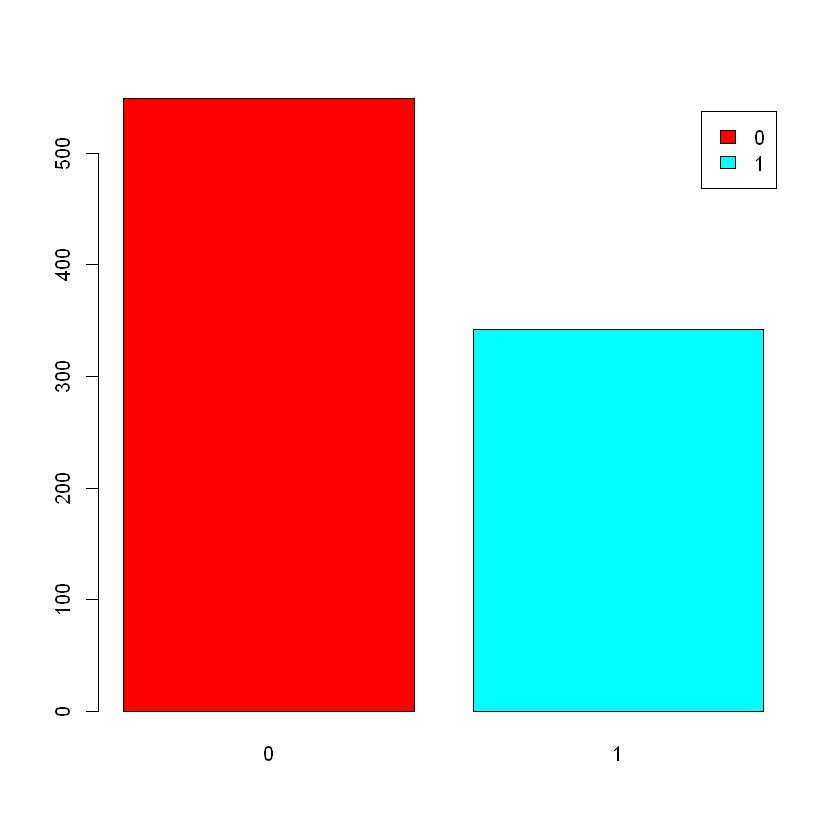

In [21]:
(tbl<-table(df$Survived))
barplot(tbl,beside=T,legend=T,col=rainbow(2)) #카운트플롯

In [22]:
library(ROSE)
#언더샘플링
df_samp<-ovun.sample(Survived ~., data=df, seed=1, method='under',
                    N=342*2)$data
(tbl<-table(df_samp$Survived))


  0   1 
342 342 

In [23]:
library(caret)
set.seed(100)
idx_train<-createDataPartition(y=df$Survived, p=0.8, list=F)
train<-df[idx_train,]
X_train<-train[,-1]
y_train<-train[,1]
test<-df[-idx_train,]
X_test<-test[,-1]
y_test<-test[,1]

[1] 0.8370787 0.7921348 0.7921348 0.7191011 0.7921348 0.7528090 0.7584270
 [8] 0.7303371 0.7415730 0.7303371

k,accuracy
1,0.8370787
2,0.7921348
3,0.7921348
4,0.7191011
5,0.7921348
6,0.7528090
7,0.7584270
8,0.7303371
9,0.7415730
10,0.7303371


k,accuracy
1,0.8370787


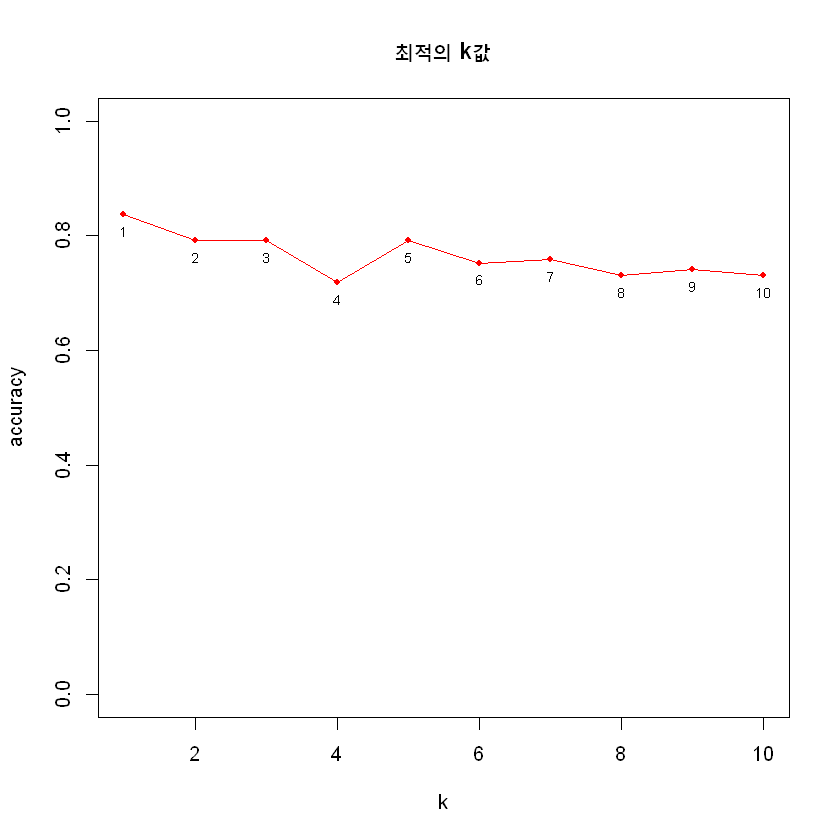

In [24]:
library(class)
acc<-NULL #비어있는 벡터 
for ( i in c(1:10)){ #k값을 1~10까지 증가시키면서 예측정확도 비교
    set.seed(123)
    pred=knn(train=train,test=test,cl=y_train,k=i)
    #벡터에 결과값 추가
    acc<-c(acc,mean(y_test == pred))

}
acc
df<-data.frame(k=c(1:10), accuracy=acc) #데이터프레임 생성
plot(accuracy ~ k, data=df, type='o', pch=20, main='최적의 k값',
    ylim=c(0,1),col='red')
#그래프에 라벨 추가
with(df,text(accuracy ~ k, labels = c(1:10), pos=1, cex=0.7))
df
#정확도가 가장 높은 k의 값 구하기
n<-min(df[df$accuracy %in% max(acc), 'k'])
df[n,]

In [25]:
library(class)
set.seed(123) #랜덤시드 고정
# knn 함수 knn(train=학습용데이터, test=검증용데이터,cl=분류라벨, k=이웃의 수)
pred<-knn(train=train, test=test, cl=y_train, k=n)
pred #모형이 예측한 값
y_test #실제값
table(y_test,pred) #오분류표
mean(y_test==pred) #예측정확도

[1] 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1
 [38] 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1
 [75] 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0
[112] 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
[149] 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1
Levels: 0 1

[1] 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 [38] 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1
 [75] 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0
[112] 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0
[149] 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1

      pred
y_test  0  1
     0 89 14
     1 15 60

[1] 0.8370787